In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\tsd95\CSV Files\Model\Heart_disease_statlog.csv")

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   70    1   3       130   322    0        2      109      0      2.4      1   
1   67    0   2       115   564    0        2      160      0      1.6      1   
2   57    1   1       124   261    0        0      141      0      0.3      0   
3   64    1   3       128   263    0        0      105      1      0.2      1   
4   74    0   1       120   269    0        2      121      1      0.2      0   

   ca  thal  target  
0   3     1       1  
1   0     3       0  
2   0     3       1  
3   1     3       0  
4   1     1       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       270.0   54.433333   9.109067   29.0   48.0   55.0   61.0   77.0
sex       270.0    0.677778   0.468195    0.0    0.0    1.0    1.0    1.0
cp        270.0    2.174074   0.950090    0.0    2.0    2.0    3.0    3.0
trestbps  270.0  131.344444  17.861608   94.0  120.0  130.0  140.0  200.0
chol      270.0  249.659259  51.686237  126.0  213.0  245.0  280.0  564.0
fbs       270.0    0.148148   0.355906    0.0    0.0    0.0    0.0    1.0
restecg   270.0    1.022222   0.997891    0.0    0.0    2.0    2.0    2.0
thalach   270.0  149.677778  23.165717   71.0  133.0  153.5  166.0  202.0
exang     270.0    0.329630   0.470952    0.0    0.0    0.0    1.0    1.0
oldpeak   270.0    1.050000   1.145210    0.0    0.0    0.8    1.6    6.2
slope     270.0    0.585185   0.614390    0.0    0.0    1.0    1.0    2.0
ca        270.0    0.670370   0.943896    0.0    0.0    0.0    1.0    3.0
thal      270.0    1.822222   0.959140    1.0    1.0    1.0    3.0    3.0
target    270.0    0.444444   0.497827    0.0    0.0    0.0    1.0    1.0

In [7]:
[col for col in df.columns if df[col].dtypes=='object']

[]

<Axes: >

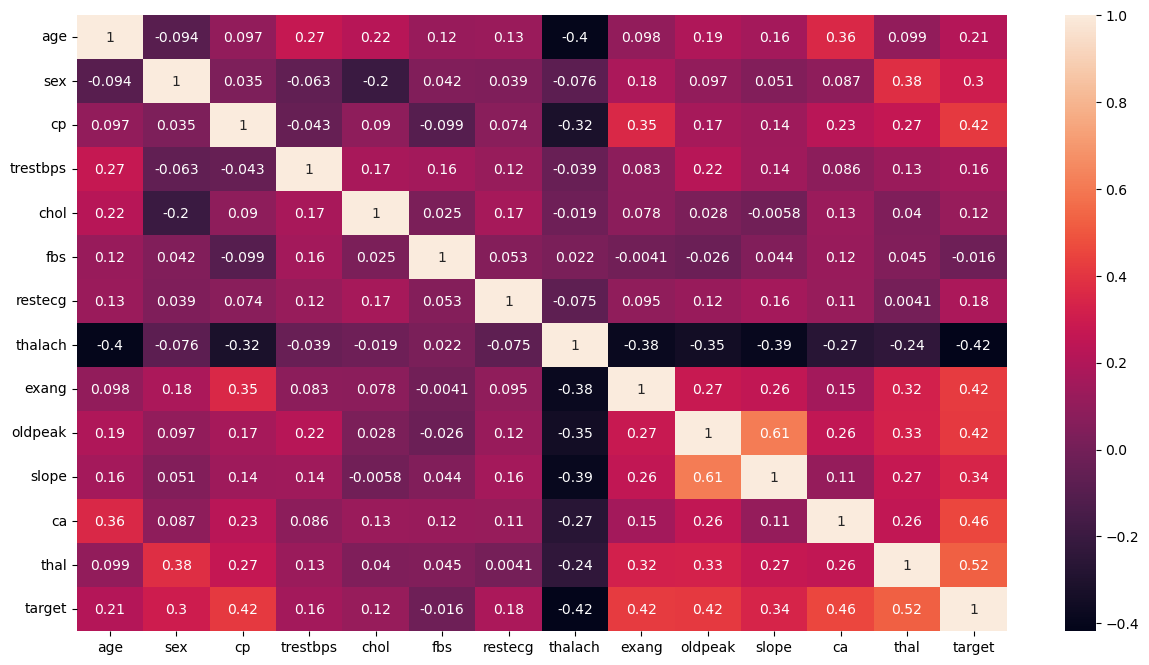

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [9]:
df.drop(columns=['fbs', 'restecg'],axis=1,inplace=True)

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
df.tail()

age  sex  cp  trestbps  chol  thalach  exang  oldpeak  slope  ca  thal  \
265   52    1   2       172   199      162      0      0.5      0   0     3   
266   44    1   1       120   263      173      0      0.0      0   0     3   
267   56    0   1       140   294      153      0      1.3      1   0     1   
268   57    1   3       140   192      148      0      0.4      1   0     2   
269   67    1   3       160   286      108      1      1.5      1   3     1   

     target  
265       0  
266       0  
267       0  
268       0  
269       1

In [12]:
df['target'].value_counts()

0    150
1    120
Name: target, dtype: int64

In [13]:
X = df[[col for col in df.columns if col not in ['target']]]
X.head()

age  sex  cp  trestbps  chol  thalach  exang  oldpeak  slope  ca  thal
0   70    1   3       130   322      109      0      2.4      1   3     1
1   67    0   2       115   564      160      0      1.6      1   0     3
2   57    1   1       124   261      141      0      0.3      0   0     3
3   64    1   3       128   263      105      1      0.2      1   1     3
4   74    0   1       120   269      121      1      0.2      0   1     1

In [14]:
y = df[[col for col in df.columns if col in ['target']]]
y.head()

target
0       1
1       0
2       1
3       0
4       0

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=50)

In [16]:
print('Size_of X_train',X_train.shape)
print('Size_of X_test',X_test.shape)
print('Size_of y_train',y_train.shape)
print('Size_of y_test',y_test.shape)

Size_of X_train (189, 11)
Size_of X_test (81, 11)
Size_of y_train (189, 1)
Size_of y_test (81, 1)


In [17]:
rf = RandomForestClassifier()

In [18]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
yPred = rf.predict(X_test)

In [20]:
yPred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
cm = confusion_matrix(y_test,yPred)
cm

array([[44,  6],
       [11, 20]], dtype=int64)

In [22]:
print(classification_report(y_test,yPred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        50
           1       0.77      0.65      0.70        31

    accuracy                           0.79        81
   macro avg       0.78      0.76      0.77        81
weighted avg       0.79      0.79      0.79        81



#### By Changing Parameters

In [23]:
rf_random = RandomForestClassifier()

hyper_random = {
    'n_estimators':[300,275,225,150,100],
    'criterion':['gini','entropy'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3,6,9],
               }

In [24]:
rf_random_para = RandomizedSearchCV(rf_random,param_distributions=hyper_random,cv=10)

In [25]:
rf_random_para.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [3, 6, 9],
                                        'n_estimators': [300, 275, 225, 150,
                                                         100]})

In [26]:
rf_random_para.best_params_

{'n_estimators': 150,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'criterion': 'entropy'}

In [28]:
rf_random_model = RandomForestClassifier(n_estimators=150,min_samples_split=6,min_samples_leaf=4,criterion='entropy')

In [29]:
rf_random_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=6, n_estimators=150)

In [30]:
yPred_random = rf_random_model.predict(X_test)

In [31]:
yPred_random

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
cm_random = confusion_matrix(y_test,yPred_random)
cm_random

array([[46,  4],
       [ 9, 22]], dtype=int64)

In [33]:
print(classification_report(y_test,yPred_random))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        50
           1       0.85      0.71      0.77        31

    accuracy                           0.84        81
   macro avg       0.84      0.81      0.82        81
weighted avg       0.84      0.84      0.84        81



In [34]:
rf_grid = RandomForestClassifier()

hyper_grid ={
    'n_estimators':[300,275,225,150,100],
    'criterion':['gini','entropy'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3,6,9]
}

In [35]:
rf_grid_para = GridSearchCV(rf_grid,param_grid=hyper_grid,cv=10)

In [36]:
rf_grid_para.fit(X_test,y_test)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [3, 6, 9],
                         'n_estimators': [300, 275, 225, 150, 100]})

In [37]:
rf_grid_para.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 300}

In [38]:
rf_grid_model = RandomForestClassifier(criterion= 'gini',min_samples_leaf= 4,min_samples_split=3,n_estimators= 300)

In [39]:
rf_grid_model.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=3,
                       n_estimators=300)

In [40]:
yPred_grid = rf_grid_model.predict(X_test)
yPred_grid

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
cm_grid = confusion_matrix(y_test,yPred_grid)
cm_grid

array([[45,  5],
       [10, 21]], dtype=int64)

In [42]:
print(classification_report(y_test,yPred_grid))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        50
           1       0.81      0.68      0.74        31

    accuracy                           0.81        81
   macro avg       0.81      0.79      0.80        81
weighted avg       0.81      0.81      0.81        81

